<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [13]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

Split: 0.05  Depth: 26  Nodes: 3225  Train set accuracy: 1.0  Test set Accuracy: 0.6358024691358025
Split: 0.1  Depth: 27  Nodes: 2993  Train set accuracy: 1.0  Test set Accuracy: 0.6445131375579598
Split: 0.15  Depth: 22  Nodes: 2891  Train set accuracy: 1.0  Test set Accuracy: 0.6257731958762887
Split: 0.2  Depth: 25  Nodes: 2783  Train set accuracy: 1.0  Test set Accuracy: 0.6148491879350348
Split: 0.3  Depth: 25  Nodes: 2461  Train set accuracy: 1.0  Test set Accuracy: 0.5884476534296029
Split: 0.4  Depth: 23  Nodes: 2203  Train set accuracy: 1.0  Test set Accuracy: 0.5736943907156673
Split: 0.5  Depth: 23  Nodes: 1801  Train set accuracy: 1.0  Test set Accuracy: 0.5471990095945528
Split: 0.6  Depth: 20  Nodes: 1461  Train set accuracy: 1.0  Test set Accuracy: 0.5432035078669074


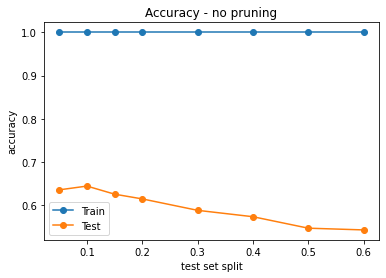

In [14]:
#decision tree classifer vs splits for no pruning
train_acc = []
test_acc = []
splits = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
treenodes = []
treedepth = []

for i in range(len(splits)):
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=splits[i], random_state=1)
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini')

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print("Split:", splits[i], " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", train_acc[i], " Test set Accuracy:",test_acc[i])

#plot results
pyplot.plot(splits, train_acc , '-o', label='Train')
pyplot.plot(splits, test_acc, '-o', label='Test')
pyplot.title('Accuracy - no pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('test set split')
pyplot.legend()
pyplot.show()


Split: 0.05  Depth: 5  Nodes: 63  Train set accuracy: 0.563793384389767  Test set Accuracy: 0.5462962962962963
Split: 0.1  Depth: 5  Nodes: 63  Train set accuracy: 0.56656346749226  Test set Accuracy: 0.5332302936630603
Split: 0.15  Depth: 5  Nodes: 63  Train set accuracy: 0.5709342560553633  Test set Accuracy: 0.5412371134020618
Split: 0.2  Depth: 5  Nodes: 63  Train set accuracy: 0.5652089783281734  Test set Accuracy: 0.5491105955143079
Split: 0.3  Depth: 5  Nodes: 63  Train set accuracy: 0.5853604599734631  Test set Accuracy: 0.5399690562145436
Split: 0.4  Depth: 5  Nodes: 61  Train set accuracy: 0.5807533539731682  Test set Accuracy: 0.5276595744680851
Split: 0.5  Depth: 5  Nodes: 63  Train set accuracy: 0.5829721362229102  Test set Accuracy: 0.5283194057567316
Split: 0.6  Depth: 5  Nodes: 63  Train set accuracy: 0.5924922600619195  Test set Accuracy: 0.5272117616713954


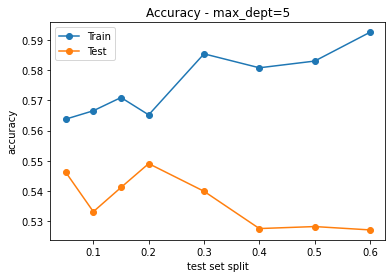

In [15]:
#decision tree classifer vs splits for max_depth=5
train_acc = []
test_acc = []
splits = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
treenodes = []
treedepth = []

for i in range(len(splits)):
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=splits[i], random_state=1)
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', max_depth=5)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print("Split:", splits[i], " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:", train_acc[i], " Test set Accuracy:",test_acc[i])


#plot results
pyplot.plot(splits, train_acc , '-o', label='Train')
pyplot.plot(splits, test_acc, '-o', label='Test')
pyplot.title('Accuracy - max_dept=5')
pyplot.ylabel('accuracy')
pyplot.xlabel('test set split')
pyplot.legend()
pyplot.show()

1 ) Depth: 1  Nodes: 3  Train set accuracy: 0.46594427244582043  Test set Accuracy: 0.4833720030935808
2 ) Depth: 2  Nodes: 7  Train set accuracy: 0.5185758513931888  Test set Accuracy: 0.5367362722351121
3 ) Depth: 3  Nodes: 15  Train set accuracy: 0.5352167182662538  Test set Accuracy: 0.5282289249806651
4 ) Depth: 4  Nodes: 31  Train set accuracy: 0.5489551083591331  Test set Accuracy: 0.559938128383604
5 ) Depth: 5  Nodes: 63  Train set accuracy: 0.5729489164086687  Test set Accuracy: 0.5537509667440061
6 ) Depth: 6  Nodes: 123  Train set accuracy: 0.5988777089783281  Test set Accuracy: 0.5560711523588554
7 ) Depth: 7  Nodes: 225  Train set accuracy: 0.6244195046439629  Test set Accuracy: 0.5614849187935035
8 ) Depth: 8  Nodes: 381  Train set accuracy: 0.6644736842105263  Test set Accuracy: 0.5676720804331014
9 ) Depth: 9  Nodes: 589  Train set accuracy: 0.7033668730650154  Test set Accuracy: 0.5668986852281516
10 ) Depth: 10  Nodes: 819  Train set accuracy: 0.7455495356037152  Tes

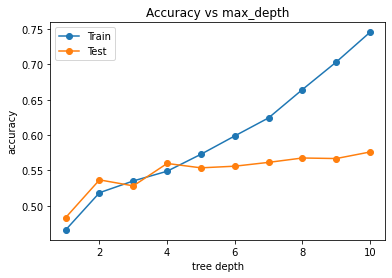

In [16]:
#decision tree classifer with max_depth
train_acc = []
test_acc = []
save_model = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14286)
max_depth_set = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in max_depth_set:
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', max_depth=i)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   if i==1:
      pick_model = model
   save_model.append(model)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))

   #print tree attributes
   print(i, ") Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:",train_acc[i-1], " Test set Accuracy:",test_acc[i-1])

print(save_model)
#plot results vs tree depth
pyplot.plot(max_depth_set, train_acc , '-o', label='Train')
pyplot.plot(max_depth_set, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs max_depth')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree depth')
pyplot.legend()
pyplot.show()

0 0.0  Depth: 20  Nodes: 787  Train set accuracy: 0.8018575851393189  Test set Accuracy: 0.5676720804331014
1 0.00025  Depth: 13  Nodes: 273  Train set accuracy: 0.666795665634675  Test set Accuracy: 0.5754060324825986
2 0.0005  Depth: 11  Nodes: 131  Train set accuracy: 0.6166795665634675  Test set Accuracy: 0.5506573859242073
3 0.00075  Depth: 7  Nodes: 51  Train set accuracy: 0.5619195046439629  Test set Accuracy: 0.5375096674400619
4 0.001  Depth: 5  Nodes: 27  Train set accuracy: 0.5477941176470589  Test set Accuracy: 0.5421500386697602
5 0.00125  Depth: 5  Nodes: 23  Train set accuracy: 0.544891640866873  Test set Accuracy: 0.5375096674400619
6 0.0015  Depth: 5  Nodes: 21  Train set accuracy: 0.544891640866873  Test set Accuracy: 0.5375096674400619
7 0.00175  Depth: 4  Nodes: 15  Train set accuracy: 0.5297987616099071  Test set Accuracy: 0.5406032482598608
8 0.002  Depth: 3  Nodes: 11  Train set accuracy: 0.5265092879256966  Test set Accuracy: 0.5460170146945089
9 0.00225  Depth:

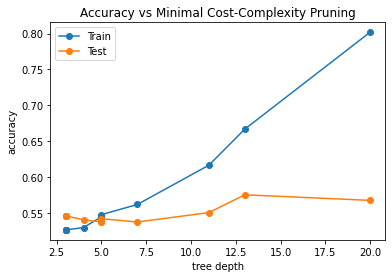

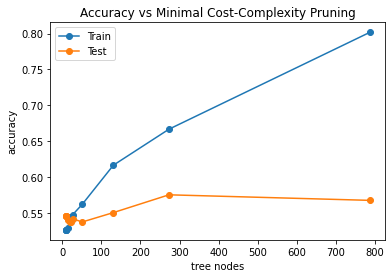

In [17]:
#decision tree classifer with Minimal Cost-Complexity Pruning 

train_acc = []
test_acc = []
treenodes = []
treedepth = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

for i in range(0,12):
   # Create Decision Tree classifer object
   model = DecisionTreeClassifier(criterion='gini', ccp_alpha=(i+2)/4000)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test dataset
   y_test_pred = model.predict(x_test)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   treenodes.append(model.tree_.node_count)
   treedepth.append(model.tree_.max_depth)

   #print tree attributes
   print(i, i/4000, " Depth:",model.tree_.max_depth, " Nodes:",model.tree_.node_count, " Train set accuracy:",train_acc[i], " Test set Accuracy:",test_acc[i])


#plot results vs tree depth
pyplot.plot(treedepth, train_acc , '-o', label='Train')
pyplot.plot(treedepth, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs Minimal Cost-Complexity Pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree depth')
pyplot.legend()
pyplot.show()

#plot results vs number of nodes
pyplot.plot(treenodes, train_acc , '-o', label='Train')
pyplot.plot(treenodes, test_acc, '-o', label='Test')
pyplot.title('Accuracy vs Minimal Cost-Complexity Pruning')
pyplot.ylabel('accuracy')
pyplot.xlabel('tree nodes')
pyplot.legend()
pyplot.show()

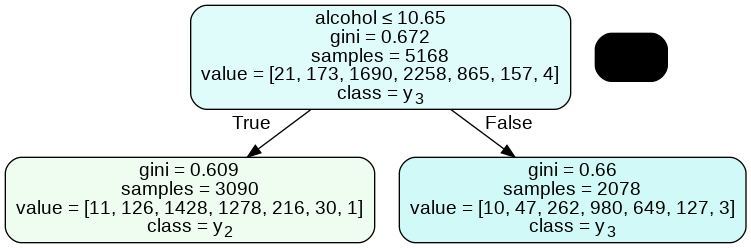

In [18]:
#Option to plot decision tree 
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

features=x.columns
dot_data = StringIO()
export_graphviz(pick_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = features, class_names=True )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())